<a href="https://colab.research.google.com/github/AjayAndData/REF_LLM/blob/main/basic_NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# NLTK and train classic ML using skit-learn

In [1]:
import nltk.data

In [16]:
ex = '''European authorities fined Google a record $5.1 billion on Wednesday for abusing its power in the mobile phone market and ordered the company to alter its practices.
I am good.'''

In [12]:
from nltk.tokenize import word_tokenize, line_tokenize

In [17]:
nltk.download('punkt')
print(word_tokenize(ex))
print(line_tokenize(ex))

['European', 'authorities', 'fined', 'Google', 'a', 'record', '$', '5.1', 'billion', 'on', 'Wednesday', 'for', 'abusing', 'its', 'power', 'in', 'the', 'mobile', 'phone', 'market', 'and', 'ordered', 'the', 'company', 'to', 'alter', 'its', 'practices', '.', 'I', 'am', 'good', '.']
['European authorities fined Google a record $5.1 billion on Wednesday for abusing its power in the mobile phone market and ordered the company to alter its practices.', 'I am good.']


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [25]:
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

stemmer = PorterStemmer()
print([stemmer.stem(word) for word in word_tokenize(ex)])

nltk.download('wordnet')
lemma = WordNetLemmatizer()
print([lemma.lemmatize(word) for word in word_tokenize(ex)])

['european', 'author', 'fine', 'googl', 'a', 'record', '$', '5.1', 'billion', 'on', 'wednesday', 'for', 'abus', 'it', 'power', 'in', 'the', 'mobil', 'phone', 'market', 'and', 'order', 'the', 'compani', 'to', 'alter', 'it', 'practic', '.', 'i', 'am', 'good', '.']


[nltk_data] Downloading package wordnet to /root/nltk_data...


['European', 'authority', 'fined', 'Google', 'a', 'record', '$', '5.1', 'billion', 'on', 'Wednesday', 'for', 'abusing', 'it', 'power', 'in', 'the', 'mobile', 'phone', 'market', 'and', 'ordered', 'the', 'company', 'to', 'alter', 'it', 'practice', '.', 'I', 'am', 'good', '.']


In [32]:
from nltk.corpus import stopwords

nltk.download('stopwords')
print(stopwords.words('english'))

[word for word in word_tokenize(ex) if word not in stopwords.words('english')]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['European',
 'authorities',
 'fined',
 'Google',
 'record',
 '$',
 '5.1',
 'billion',
 'Wednesday',
 'abusing',
 'power',
 'mobile',
 'phone',
 'market',
 'ordered',
 'company',
 'alter',
 'practices',
 '.',
 'I',
 'good',
 '.']

In [51]:
### Sentiment data
import pandas as pd

data= pd.read_csv('/content/sample_data/iphone-nlp-kaggle.csv')

In [52]:
data.head()

,productAsin,country,date,isVerified,ratingScore,reviewTitle,reviewDescription,reviewUrl,reviewedIn,variant,variantAsin
0,B09G9BL5CP,India,11-08-2024,True,4,No charger,"Every thing is good about iPhones, there's not...",https://www.amazon.in/gp/customer-reviews/R345...,Reviewed in India on 11 August 2024,Colour: MidnightSize: 256 GB,B09G9BQS98
1,B09G9BL5CP,India,16-08-2024,True,5,iPhone 13 256GB,"It look so fabulous, I am android user switche...",https://www.amazon.in/gp/customer-reviews/R2HJ...,Reviewed in India on 16 August 2024,Colour: MidnightSize: 256 GB,B09G9BQS98
2,B09G9BL5CP,India,14-05-2024,True,4,Flip camera option nill,I tried to flip camera while recording but no ...,https://www.amazon.in/gp/customer-reviews/R3Y7...,Reviewed in India on 14 May 2024,Colour: MidnightSize: 256 GB,B09G9BQS98
3,B09G9BL5CP,India,24-06-2024,True,5,Product,100% genuine,https://www.amazon.in/gp/customer-reviews/R1P9...,Reviewed in India on 24 June 2024,Colour: MidnightSize: 256 GB,B09G9BQS98
4,B09G9BL5CP,India,18-05-2024,True,5,Good product,Happy to get the iPhone 13 in Amazon offer,https://www.amazon.in/gp/customer-reviews/R1XI...,Reviewed in India on 18 May 2024,Colour: MidnightSize: 256 GB,B09G9BQS98


In [53]:
data.isnull().sum()

,0
productAsin,0
country,0
date,0
isVerified,0
ratingScore,0
reviewTitle,0
reviewDescription,86
reviewUrl,16
reviewedIn,0
variant,0


In [54]:
data[data['reviewDescription'].isnull()]

,productAsin,country,date,isVerified,ratingScore,reviewTitle,reviewDescription,reviewUrl,reviewedIn,variant,variantAsin
26,B09G9BL5CP,India,07-08-2024,False,4,Camera is impressive but i am not happy with b...,NaN,https://www.amazon.in/gp/customer-reviews/R15D...,Reviewed in India on 7 August 2024,Colour: BlueSize: 256 GB,B09G93H3BR
37,B09G9BL5CP,India,29-10-2023,True,4,Bawal chij hai be..😀,NaN,https://www.amazon.in/gp/customer-reviews/R2LG...,Reviewed in India on 29 October 2023,Colour: GreenSize: 256 GB,B09V4MXBSN
72,B09G9BL5CP,India,15-09-2024,True,5,Loved it,NaN,https://www.amazon.in/gp/customer-reviews/R2EK...,Reviewed in India on 15 September 2024,Colour: StarlightSize: 128 GB,B09G9D8KRQ
76,B09G9BL5CP,India,07-08-2024,True,4,Camera quality is good,NaN,https://www.amazon.in/gp/customer-reviews/R2MX...,Reviewed in India on 7 August 2024,Colour: StarlightSize: 128 GB,B09G9D8KRQ
141,B09G9BL5CP,India,07-10-2022,True,5,Little heavy but Superb phone,NaN,https://www.amazon.in/gp/customer-reviews/R386...,Reviewed in India on 7 October 2022,Colour: MidnightSize: 256 GB,B09G9BQS98
...,...,...,...,...,...,...,...,...,...,...,...
2974,B09G9D8KRQ,India,07-10-2023,False,5,Very cool product,NaN,https://www.amazon.in/gp/customer-reviews/R4CT...,Reviewed in India on 7 October 2023,Colour: BlueSize: 256 GB,B09G93H3BR
2984,B09G9D8KRQ,India,01-08-2022,True,1,scracth on screen of iphone,NaN,https://www.amazon.in/gp/customer-reviews/R2UX...,Reviewed in India on 1 August 2022,Colour: StarlightSize: 256 GB,B09G9BFKZN
2985,B09G9D8KRQ,India,06-06-2022,True,1,Waste phone,NaN,https://www.amazon.in/gp/customer-reviews/R3KL...,Reviewed in India on 6 June 2022,Colour: StarlightSize: 256 GB,B09G9BFKZN
3021,B09G9D8KRQ,India,10-06-2022,True,5,Worth it,NaN,https://www.amazon.in/gp/customer-reviews/R2ZZ...,Reviewed in India on 10 June 2022,Colour: BlueSize: 256 GB,B09G93H3BR


In [56]:
data['final_review'] = data['reviewTitle'] + ' > ' + data['reviewDescription']
data.head()

,productAsin,country,date,isVerified,ratingScore,reviewTitle,reviewDescription,reviewUrl,reviewedIn,variant,variantAsin,final_review
0,B09G9BL5CP,India,11-08-2024,True,4,No charger,"Every thing is good about iPhones, there's not...",https://www.amazon.in/gp/customer-reviews/R345...,Reviewed in India on 11 August 2024,Colour: MidnightSize: 256 GB,B09G9BQS98,No charger > Every thing is good about iPhones...
1,B09G9BL5CP,India,16-08-2024,True,5,iPhone 13 256GB,"It look so fabulous, I am android user switche...",https://www.amazon.in/gp/customer-reviews/R2HJ...,Reviewed in India on 16 August 2024,Colour: MidnightSize: 256 GB,B09G9BQS98,"iPhone 13 256GB > It look so fabulous, I am an..."
2,B09G9BL5CP,India,14-05-2024,True,4,Flip camera option nill,I tried to flip camera while recording but no ...,https://www.amazon.in/gp/customer-reviews/R3Y7...,Reviewed in India on 14 May 2024,Colour: MidnightSize: 256 GB,B09G9BQS98,Flip camera option nill > I tried to flip came...
3,B09G9BL5CP,India,24-06-2024,True,5,Product,100% genuine,https://www.amazon.in/gp/customer-reviews/R1P9...,Reviewed in India on 24 June 2024,Colour: MidnightSize: 256 GB,B09G9BQS98,Product > 100% genuine
4,B09G9BL5CP,India,18-05-2024,True,5,Good product,Happy to get the iPhone 13 in Amazon offer,https://www.amazon.in/gp/customer-reviews/R1XI...,Reviewed in India on 18 May 2024,Colour: MidnightSize: 256 GB,B09G9BQS98,Good product > Happy to get the iPhone 13 in A...


In [62]:
vis_1 = data['country'].value_counts().reset_index()
vis_1.head()

,country,count
0,India,2229
1,United States,579
2,Japan,158
3,United Arab Emirates,80
4,Mexico,11


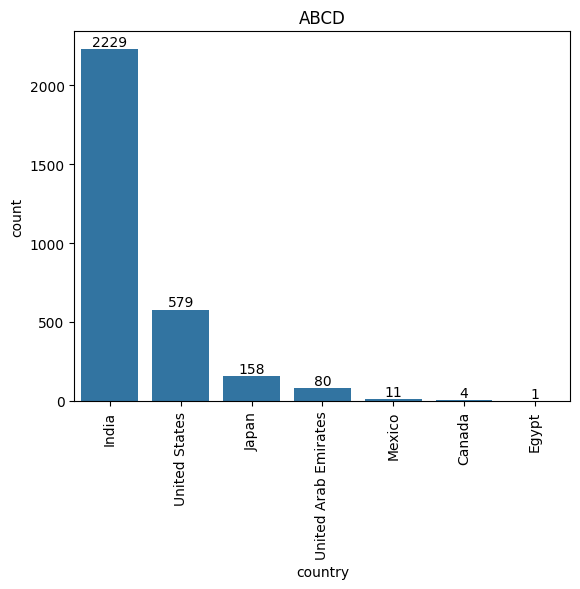

<BarContainer object of 7 artists>


In [75]:
from matplotlib import pyplot as plt
import seaborn as sns
ax = sns.barplot(data=vis_1, x='country', y='count')
plt.xticks(rotation=90)
plt.title('ABCD')
ax.bar_label(ax.containers[0])
plt.show()

In [76]:
sample_df = data[['final_review','ratingScore']]
sample_df.head()

,final_review,ratingScore
0,No charger > Every thing is good about iPhones...,4
1,"iPhone 13 256GB > It look so fabulous, I am an...",5
2,Flip camera option nill > I tried to flip came...,4
3,Product > 100% genuine,5
4,Good product > Happy to get the iPhone 13 in A...,5


In [84]:
## Tokenization & Stopword removal
sample_df['tokens'] = sample_df['final_review'].apply(lambda x: ' '.join([word for word in str(x).split() if word not in stopwords.words('english')]))
sample_df.head()

<ipython-input-84-0961328b0cc2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sample_df['tokens'] = sample_df['final_review'].apply(lambda x: ' '.join([word for word in str(x).split() if word not in stopwords.words('english')]))


,final_review,ratingScore,tokens
0,No charger > Every thing is good about iPhones...,4,"No charger > Every thing good iPhones, there's..."
1,"iPhone 13 256GB > It look so fabulous, I am an...",5,"iPhone 13 256GB > It look fabulous, I android ..."
2,Flip camera option nill > I tried to flip came...,4,Flip camera option nill > I tried flip camera ...
3,Product > 100% genuine,5,Product > 100% genuine
4,Good product > Happy to get the iPhone 13 in A...,5,Good product > Happy get iPhone 13 Amazon offer


In [86]:
##stemming
from nltk.stem import PorterStemmer, WordNetLemmatizer
stemmer = PorterStemmer()
sample_df['tokens'] = sample_df['tokens'].apply(lambda x: ' '.join ([stemmer.stem(word) for word in word_tokenize(str(x))]))
sample_df.head()

<ipython-input-86-d52e609fa871>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sample_df['tokens'] = sample_df['tokens'].apply(lambda x: ' '.join ([stemmer.stem(word) for word in word_tokenize(str(x))]))


,final_review,ratingScore,tokens
0,No charger > Every thing is good about iPhones...,4,"no charger > everi thing good iphon , there 's..."
1,"iPhone 13 256GB > It look so fabulous, I am an...",5,"iphon 13 256gb > it look fabul , i android use..."
2,Flip camera option nill > I tried to flip came...,4,flip camera option nill > i tri flip camera re...
3,Product > 100% genuine,5,product > 100 % genuin
4,Good product > Happy to get the iPhone 13 in A...,5,good product > happi get iphon 13 amazon offer


In [97]:
sample_df.shape

(3062, 3)

In [109]:
## Feature creation
from sklearn.feature_extraction.text import CountVectorizer
cnt = CountVectorizer( ngram_range=(1,2)) ## Min to max ngrams
new_cnt_df = cnt.fit_transform(sample_df['tokens'])
new_cnt_df.shape

(3062, 43066)

In [110]:
cnt.vocabulary_

{'no': 25378,
 'charger': 8217,
 'everi': 13430,
 'thing': 38028,
 'good': 16594,
 'iphon': 19536,
 'there': 37788,
 'noth': 25728,
 'compar': 9019,
 'speed': 35846,
 'io': 19438,
 'disappoint': 11686,
 'even': 13255,
 'though': 38183,
 'indian': 19145,
 'judiciari': 20814,
 'told': 38651,
 'provid': 30469,
 'still': 36146,
 'made': 22848,
 'progress': 30321,
 'regard': 31962,
 'whi': 41576,
 'spend': 35876,
 '62k': 1355,
 'brand': 6332,
 'acessori': 1926,
 'comfort': 8925,
 'size': 35023,
 'featur': 14640,
 'right': 32693,
 'that': 37483,
 'what': 41437,
 'point': 29180,
 'buy': 6769,
 'iphone': 19881,
 'thank': 37453,
 'you': 42729,
 'no charger': 25398,
 'charger everi': 8240,
 'everi thing': 13455,
 'thing good': 38052,
 'good iphon': 16739,
 'iphon there': 19839,
 'there noth': 37828,
 'noth compar': 25734,
 'compar speed': 9056,
 'speed io': 35858,
 'io disappoint': 19458,
 'disappoint there': 11737,
 'there charger': 37800,
 'charger even': 8239,
 'even though': 13374,
 'though 

In [127]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(new_cnt_df, sample_df['ratingScore'], test_size=0.2, stratify=sample_df['ratingScore'])
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2449, 43066), (613, 43066), (2449,), (613,))

In [128]:
sample_df['ratingScore'].value_counts()

,count
ratingScore,
5,1604
1,587
4,461
3,239
2,171


In [129]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train, y_train)

RandomForestClassifier()

In [130]:
from sklearn.metrics import classification_report
print(f'train:\n{classification_report(y_train,rf_clf.predict(X_train))}')
print(f'test:\n{classification_report(y_test,rf_clf.predict(X_test))}')

train:
              precision    recall  f1-score   support

           1       1.00      0.98      0.99       469
           2       1.00      0.98      0.99       137
           3       1.00      0.96      0.98       191
           4       1.00      0.92      0.96       369
           5       0.97      1.00      0.98      1283

    accuracy                           0.98      2449
   macro avg       0.99      0.97      0.98      2449
weighted avg       0.98      0.98      0.98      2449

test:
              precision    recall  f1-score   support

           1       0.76      0.63      0.69       118
           2       1.00      0.24      0.38        34
           3       0.89      0.17      0.28        48
           4       0.77      0.45      0.57        92
           5       0.70      0.97      0.81       321

    accuracy                           0.72       613
   macro avg       0.82      0.49      0.55       613
weighted avg       0.75      0.72      0.69       613



In [138]:
## Cross validation
from sklearn.model_selection import cross_validate
cv_res = cross_validate(rf_clf,X_train,y_train,scoring= ('f1_weighted'), cv=3, return_train_score=True)

In [139]:
cv_res

{'fit_time': array([10.77250409,  9.06141973, 10.78759313]),
 'score_time': array([0.08463359, 0.09055281, 0.08851433]),
 'test_score': array([0.59245781, 0.61460553, 0.6348793 ]),
 'train_score': array([0.98151265, 0.98270906, 0.97918049])}

In [140]:
rf_clf.predict_proba(X_train)

array([[0.  , 0.03, 0.04, 0.69, 0.24],
       [0.  , 0.  , 0.01, 0.09, 0.9 ],
       [0.68, 0.02, 0.03, 0.1 , 0.17],
       ...,
       [0.77, 0.02, 0.06, 0.02, 0.13],
       [0.01, 0.02, 0.01, 0.02, 0.94],
       [0.02, 0.01, 0.9 , 0.01, 0.06]])

# Spacy